# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama :** Muhammad Aditya Bayhaqie
- **Email :** adityabayhaqie@gmail.com
- **ID Dicoding :** Aditya Bayhaqie

## Menentukan Pertanyaan Bisnis

- Which is the Highest Frequency on Buying Customer by City in our E-Commerce?
- Which is the Top Product and Top Seller in our E -Commerce?
- How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?
- Which Payment Method used in Buying the Items in our E-Commerce?
- When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?
- How big is the Purchase Growth on this E-Commerce? 

#### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


## Data Wrangling

### Gathering Data

#### Assigning Customer Data Variables

In [2]:
customer_df = pd.read_csv("Data/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Assigning Geolocation Dataset

In [3]:
geoloc_df = pd.read_csv("Data/olist_geolocation_dataset.csv")
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Assigning Order Items

In [4]:
orderitems_df = pd.read_csv("Data/olist_order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Assigning Payment Order

In [5]:
payment_df = pd.read_csv("Data/olist_order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Assigning Order Reviews

In [6]:
order_review_df = pd.read_csv("Data/olist_order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Assigning Orders

In [7]:
orders_df = pd.read_csv("Data/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Assigning Products

In [8]:
products_df = pd.read_csv("Data/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Assigning Sellers

In [9]:
sellers_df = pd.read_csv("Data/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Assigning Product Category

In [10]:
productcategory_df = pd.read_csv("Data/product_category_name_translation.csv")
productcategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- There is in Total 9 Datasets with Various Purposes
    - Customer Dataset
    - Geolocation
    - Order Items
    - Payments
    - Order Reviews
    - Orders
    - Products
    - Sellers
    - Product Category

### Data Assesment

#### Assessing Customer Data

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Data Duplikat : ",customer_df.duplicated().sum())

Data Duplikat :  0


##### Separate Duplicate Checking
Guna memastikan tidak ada Duplikasi terutama pada ID Pelanggan

In [14]:
customer_df['customer_id'].duplicated().sum()

np.int64(0)

In [15]:
customer_df['customer_unique_id'].duplicated().sum()

np.int64(3345)

In [16]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assesing Geolocation Data

In [17]:
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geoloc_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
geoloc_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Assesing Order items Data

In [20]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Data Type for *shipping_limit_date* is not **Datetime**

In [21]:
orderitems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
orderitems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Separate Duplicate Checking
Guna memastikan tidak ada Duplikasi terutama pada ID Pemesanan

In [23]:
orderitems_df['order_id'].isna().sum()

np.int64(0)

In [24]:
orderitems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Assessing Payment Orders

In [25]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Assesing Order Review

In [28]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Surely there is a Null or Empty Comments in *review_comment_title* and *comment_message*

Also Data Type for *review_creation_date* & *review_answer_timestamp* is not **Datetime**

In [29]:
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
print(order_review_df[order_review_df.duplicated(subset=['review_comment_title', 'review_comment_message'], keep=False)])

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
5      15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6      07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
...                                 ...                               ...   
99217  c6b270c61f67c9f7cb07d84ea8aeaf8b  48f7ee67313eda32bfcf5b9c1dd9522d   
99218  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score review_comment_title review_comment_message  \
0       

Dapat Disimpulkan bahwa Data Terduplikasi merupakan data dengan **Nilai NULL**

In [31]:
order_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assesing Orders

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
cancelled_orders = orders_df[orders_df['order_status'] == 'canceled']

# Display information about the cancelled orders
cancelled_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 397 to 99347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       625 non-null    object
 1   customer_id                    625 non-null    object
 2   order_status                   625 non-null    object
 3   order_purchase_timestamp       625 non-null    object
 4   order_approved_at              484 non-null    object
 5   order_delivered_carrier_date   75 non-null     object
 6   order_delivered_customer_date  6 non-null      object
 7   order_estimated_delivery_date  625 non-null    object
dtypes: object(8)
memory usage: 43.9+ KB


625 Canceled Order

In [34]:
unavailable_orders = orders_df[orders_df['order_status'] == 'unavailable']

# Display information about the cancelled orders
unavailable_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 266 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       609 non-null    object
 1   customer_id                    609 non-null    object
 2   order_status                   609 non-null    object
 3   order_purchase_timestamp       609 non-null    object
 4   order_approved_at              609 non-null    object
 5   order_delivered_carrier_date   0 non-null      object
 6   order_delivered_customer_date  0 non-null      object
 7   order_estimated_delivery_date  609 non-null    object
dtypes: object(8)
memory usage: 42.8+ KB


609 Unavailable Order

In [35]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [36]:
print("Data Yang tidak lengkap : ", orders_df.isna().sum().order_delivered_customer_date)

Data Yang tidak lengkap :  2965


Surely there is a Null or Empty Data in *order_delivered_carrier_date*, *order_delivered_customer_date* and *order_estimated_delivery_date*, Probably Due to Order Cancellation and Data Incomplete

Also Data Type from Colum 3 to Column 7 is not **Datetime**

In [37]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

The Null data is Still **Valid** since the process affect the timeline

Delivered Data Example

In [38]:
orders_df[orders_df['order_status'] == 'delivered'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [39]:
orders_df[orders_df['order_status'] == 'shipped'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00


In [40]:
orders_df[orders_df['order_status'] == 'canceled'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00


In [41]:
orders_df[orders_df['order_status'] == 'unavailable'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00


In [42]:
orders_df[orders_df['order_status'] == 'invoiced'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaN,NaN,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaN,NaN,2017-12-20 00:00:00


In [43]:
orders_df[orders_df['order_status'] == 'processing'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00


In [44]:
orders_df[orders_df['order_status'] == 'created'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


In [45]:
orders_df[orders_df['order_status'] == 'approved'].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


In [46]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Assessing Products

In [47]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [48]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [49]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Missing Value in *product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm* 

#### Assessing Sellers

In [50]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [51]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [52]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


No Problem Occuring in Sellers Data

#### Assessing Product Category

In [53]:
productcategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [54]:
productcategory_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [55]:
productcategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Customer Dataset
    - There is no Duplication or NULL Values finded in Customer Dataset
- Geolocation
    - There is no Duplication or NULL Values finded in Geolocation Dataset
- Order Items
    - Data Type for *shipping_limit_date* is not **Datetime**
- Payments
    - There is no Duplication or NULL Values finded in Payments Dataset
- Order Reviews
    - Some Null and Empty Comments in *review_comment_title* and *review_comment_message*
    - Data Type for *review_creation_date* & *review_answer_timestamp* is not **Datetime**
- Orders
    - Some Null or Empty Data in *order_delivered_carrier_date*, *order_delivered_customer_date* and *order_estimated_delivery_date*, Probably Due to Order Cancellation and Data Loss, **[EDIT]** This Data is still **Valid**
    - Data Type from Colum 3 to Column 7 is not **Datetime**
- Products
    - Null Value in*product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm* 
- Sellers
    - There is no Duplication or NULL Values finded in Sellers Dataset
- Product Category
    - There is no Duplication or NULL Values finded in Product Category Dataset

### Data Cleaning

#### Customer Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Geolocation Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Order Items Dataset
- **Issues :** Data type for *shipping_limit_date* is not **Datetime**.
- **Action :** Changing Data Type for *shipping_limit_date* to **Datetime**.

In [56]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [57]:
orderitems_df['shipping_limit_date'] = pd.to_datetime(orderitems_df['shipping_limit_date'])

In [58]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Order Payments Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Order Reviews Dataset
- **Issues :** 
    - Null or empty values in *review_comment_title* and *review_comment_message*.
    - Data types for *review_creation_date* and *review_answer_timestamp* are not **Datetime** format.
- **Action :**
    - Handle the null values in *review_comment_title* and *review_comment_message* by Changing the NULL values into [No Message]
    - Convert *review_creation_date* and *review_answer_timestamp* to **Datetime** format

**1st Action:** Handle the null values in *review_comment_title* and *review_comment_message* by Changing the NULL values into [No Message]

In [59]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [60]:
order_review_df[order_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [61]:
order_review_df['review_comment_title'].fillna('[No Message]', inplace=True)
order_review_df['review_comment_message'].fillna('[No Message]', inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1608081237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_review_df['review_comment_title'].fillna('[No Message]', inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1608081237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [62]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [63]:
order_review_df[order_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [64]:
order_review_df.review_comment_title.value_counts()

review_comment_title
[No Message]                 87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Nota máxima!                     1
muito bom produto                1
Não foi entregue o pedido        1
OTIMA EMBALAGEM                  1
Foto enganosa                    1
Name: count, Length: 4528, dtype: int64

In [65]:
order_review_df.review_comment_message.value_counts()

review_comment_message
[No Message]                                                                                                                     58247
Muito bom                                                                                                                          230
Bom                                                                                                                                189
muito bom                                                                                                                          122
bom                                                                                                                                107
                                                                                                                                 ...  
para este produto recebi de acordo com a compra realizada!                                                                           1
Entregou dentro do prazo. O prod

**2nd Action:** Convert *review_creation_date* and *review_answer_timestamp* to **Datetime** format

In [66]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [67]:
order_review_df['review_creation_date'] = pd.to_datetime(order_review_df['review_creation_date'])
order_review_df['review_answer_timestamp'] = pd.to_datetime(order_review_df['review_answer_timestamp'])

In [68]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Orders Dataset
- **Issues :** 
    - Data types for columns 3 to 7 (dates) are not **Datetime**.
- **Action :**
    - Convert columns 3 to 7 to **Datetime** format

In [69]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [70]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [71]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Products Dataset
- **Issues :** 
    - Null values in several columns 
        - *product_category_name*
        - *product_name_lenght* 
        - *product_description_lenght* 
        - *product_photos_qty* 
        - *product_weight_g* 
        - *product_length_cm*
        - *product_height_cm*
        - *product_width_cm*
- **Action :**
    - Replacing Data with Several values taking from Mean and Median from Overall Products

In [72]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [73]:
products_df['product_category_name'].fillna('Unlisted Category', inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].median(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].median(), inplace=True)


C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1556701351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('Unlisted Category', inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1556701351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [74]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Sellers Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

#### Product Category Dataset
- **Action :** Since no duplication or null values were found, no further cleaning is needed for this dataset.

## Exploratory Data Analysis (EDA)

### Explore Datasets

In [75]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [76]:
geoloc_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [77]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [78]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Creating Clearer City Latitude and Longitude**

In [79]:
geoloc_df.groupby(by="geolocation_city").agg({
    "geolocation_lat": ["max", "min", "mean", "std"],
    "geolocation_lng": ["max", "min", "mean", "std"]
})

geolocation_lat                                  \
                               max        min       mean       std   
geolocation_city                                                     
* cidade                -25.571748 -25.571748 -25.571748       NaN   
...arraial do cabo      -22.969370 -22.969370 -22.969370       NaN   
4o. centenario          -24.271860 -24.271860 -24.271860       NaN   
4º centenario           -24.277697 -24.281905 -24.279801  0.002976   
abadia de goias         -16.756821 -16.789539 -16.767063  0.009978   
...                            ...        ...        ...       ...   
áurea                   -27.692454 -27.697565 -27.695009  0.003614   
ângulo                  -23.193593 -23.198309 -23.195024  0.002241   
érico cardoso           -13.393047 -13.393047 -13.393047       NaN   
óbidos                   -1.897693  -1.917688  -1.907183  0.005624   
óleo                    -22.937454 -22.944293 -22.940222  0.003242   

                   geolocation_lng                                  
                               max        min       mean       std  
geolocation_city                                                    
* cidade                -49.334374 -49.334374 -49.334374       NaN  
...arraial do cabo      -42.029834 -42.029834 -42.029834       NaN  
4o. centenario          -53.069433 -53.069433 -53.069433       NaN  
4º centenario           -53.074516 -53.074930 -53.074723  0.000293  
abadia de goias         -49.426674 -49.469430 -49.438089  0.013241  
...                            ...        ...        ...       ...  
áurea                   -52.054195 -52.055957 -52.055076  0.001246  
ângulo                  -51.916100 -51.918154 -51.917294  0.001030  
érico cardoso           -42.134282 -42.134282 -42.134282       NaN  
óbidos                  -55.510995 -55.524011 -55.516370  0.003631  
óleo                    -49.336995 -49.343426 -49.339676  0.002987  

[8011 rows x 8 columns]

**Examining Customer City and State**

In [80]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Exploring for Delay in Product Delivery**

In [81]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

# Calculate the difference in days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

# Filter to only delivered orders
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']

# Summary of delay (negative means delivered earlier, positive means delayed)
delivery_summary = delivered_orders['delivery_delay'].describe()
print(delivery_summary)

count    96470.000000
mean       -11.875889
std         10.182105
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


**Tracing Shipped Product trough Orders then to Customer ID**

In [82]:
# Filter the orders_df for orders with status 'shipped'
shipped_orders = orders_df[orders_df['order_status'] == 'shipped']

# Get the customer_id from the shipped orders
shipped_customer_ids = shipped_orders['customer_id'].tolist()

# Merge with customers_df to get the customer_city for those customers
shipped_customers_df = customer_df[customer_df['customer_id'].isin(shipped_customer_ids)]

# Display relevant columns (customer_id and customer_city)
result = shipped_customers_df[['customer_id', 'customer_city']]

# Show the result
print(result)

                            customer_id   customer_city
70     4c7241af24b5344cb01fe687643de4fe       fortaleza
79     f6529ffebe6b3440d45d89604a4239ac     nova iguacu
100    ae76a4650235ab18764708174f1da31e       sao paulo
113    8891eb5ca0e28df961b2b5b8f3c0eb23       sao paulo
224    265655cf1f2dfd4fc630004d1fe5f3cb     hortolandia
...                                 ...             ...
99084  7fa80efb1ef15ca4104627910c29791c        camacari
99248  6a65b5d6d4f4c9dfda93798cf014ee47       sao paulo
99280  9ce70b8dafe76524f3d5e5e68cbf29f5  ribeirao preto
99288  2a6fc1968c4a29c9c258bb1994afbc7f   volta redonda
99351  f83083fcbc51d12f8279b5713c2d4b4d       araguaina

[1107 rows x 2 columns]


**Insight:**
- By Defining City Longitude and Langitude, i able to Calculate the City Size
- By Examining Customer City and State, it will help me to Taking Conclusion for the Most Highest Customer by City or State
- Upon Exploring Delay of Shipment, i found out that some delivery will be Delayed by Months or Delivered Earlier
- Tracing the Shipped Product to where it goes also helping us to track the product destinations

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Which is the Highest Frequency on Buying Customer by City in our E-Commerce?

**Step Method**
- Counting the Buying Customer through their Order
- Filtering Successfull Order marked as 'Delivered'
- Merging the order with Customer Database (since there is a connection between Order Dataset and Customer Dataset through Customer_ID)
- Creating a New Variables <top_cities> to grouping the order based on city and counting the number of Purchases
- Visualize it  

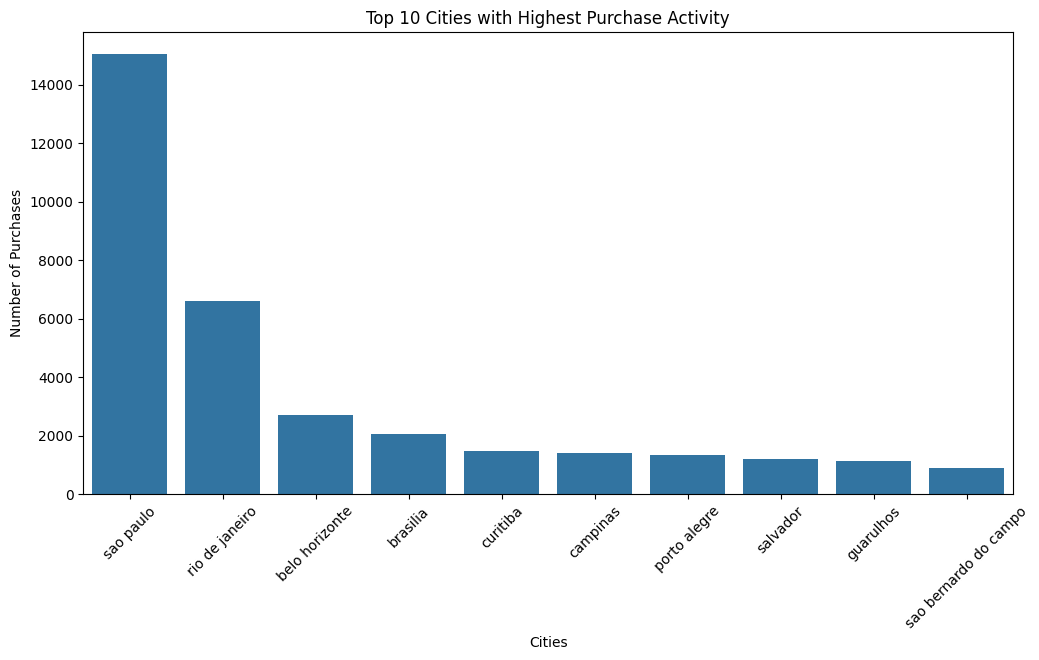

In [130]:
# Filter for successful orders
successful_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge with customer data to get city information
order_city_data = pd.merge(successful_orders, customer_df, on='customer_id')

# Group by city and count the number of purchases
top_cities = order_city_data.groupby('customer_city').size().sort_values(ascending=False).head(10)

# Plotting the top cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with Highest Purchase Activity')
plt.xlabel('Cities')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2 : Which is the Top Product and Top Seller in our E -Commerce?

**Step Method**
- Merging Dataset of Products and Sellers daset to Order Items
- Products
    - Calculating Total Sales Gained from Products
    - Merging Product ID with Product Category
    - Sorting the Top Products
- Sellers
    - Calculating Total Sales Gained by Sellers
    - Merging the Seller ID and Seller City to Top Sellers variables
    - Sorting the Top Sellers
- Visualize it  

Top 10 Products:
                             product_id   product_category_name  total_sales
24086  bb50f2e236e5eea0100680137654686c            beleza_saude     63885.00
14068  6cdd53843498f92890544667809f1595            beleza_saude     54730.20
27613  d6160fb7873f184099d9bc95e30376af                     pcs     48899.34
27039  d1c427060a0f73f6b889a5c7c61f2ac4  informatica_acessorios     47214.51
19742  99a4788cb24856965c36a24e339b6058         cama_mesa_banho     43025.56
8051   3dd2a17168ec895c781a9191c1e95ad7  informatica_acessorios     41082.60
4996   25c38557cf793876c5abdd5931f922db                   bebes     38907.32
12351  5f504b3a1c75b73d6151be81eb05bdc9              cool_stuff     37733.90
10867  53b36df67ebb7c41585e8d54d6772e08      relogios_presentes     37683.42
22112  aca2eb7d00ea1a7b8ebd4e68314663af        moveis_decoracao     37608.90

Top 10 Sellers:
                             seller_id       seller_city seller_state  \
857   4869f7a5dfa277a7dca6462dcf3b52b2        

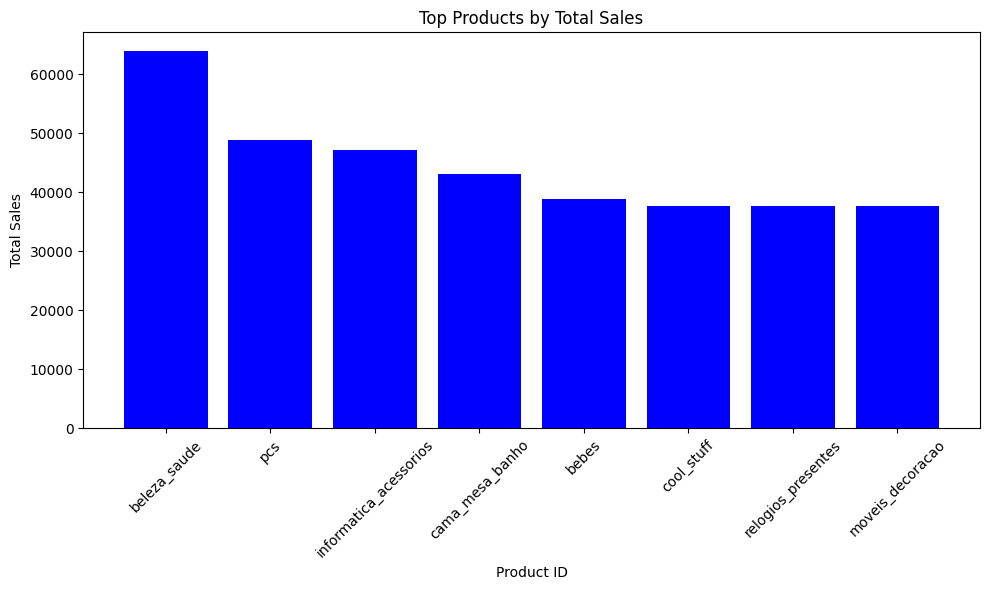

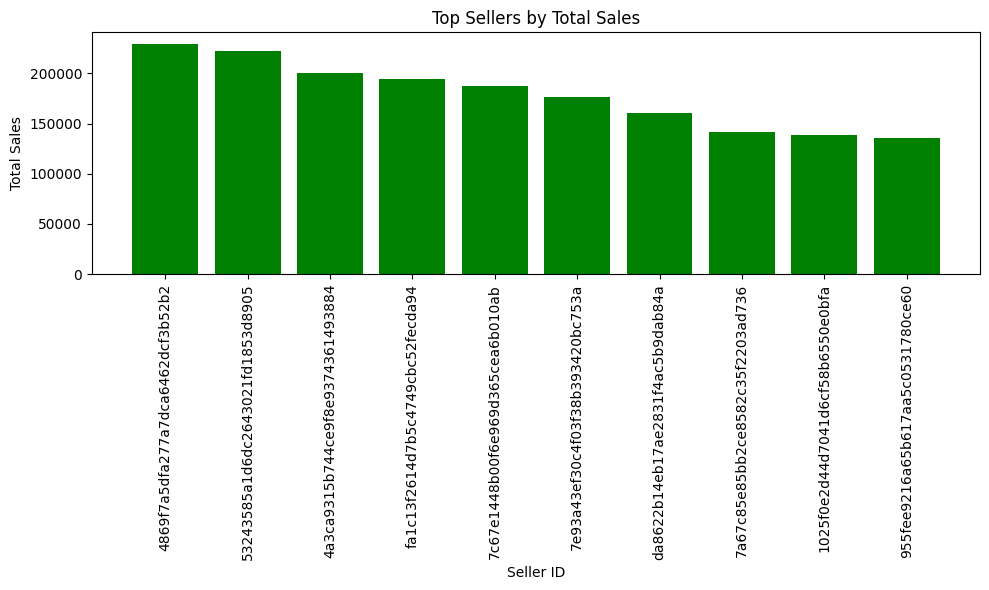

In [134]:
# Merge DataFrames
merged_df = orderitems_df.merge(products_df, on='product_id', how='left') \
                           .merge(sellers_df, on='seller_id', how='left')

# Calculate total sales per product
top_products = merged_df.groupby('product_id').agg({'price': 'sum'}).reset_index()
top_products.columns = ['product_id', 'total_sales']

# Merge to get product names and categories
top_products = top_products.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Sort and select top 10 products
top_10_products = top_products.sort_values(by='total_sales', ascending=False).head(10)

# Calculate total sales per seller
top_sellers = merged_df.groupby('seller_id').agg({'price': 'sum'}).reset_index()
top_sellers.columns = ['seller_id', 'total_sales']

# Merge to get seller cities and states
top_sellers = top_sellers.merge(sellers_df[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

# Sort and select top 10 sellers
top_10_sellers = top_sellers.sort_values(by='total_sales', ascending=False).head(10)

# Display the results
print("Top 10 Products:")
print(top_10_products[['product_id', 'product_category_name', 'total_sales']])

print("\nTop 10 Sellers:")
print(top_10_sellers[['seller_id', 'seller_city', 'seller_state', 'total_sales']])

# Data Visualization

# Plot Top Products
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_category_name'], top_10_products['total_sales'], color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top Products by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

# Plot Top Sellers by ID
plt.figure(figsize=(10, 6))
plt.bar(top_10_sellers['seller_id'], top_10_sellers['total_sales'], color='green')
plt.xlabel('Seller ID')
plt.ylabel('Total Sales')
plt.title('Top Sellers by Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

### Pertanyaan 3 : How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?

**Step Method**
- Filtering Successfull Order marked as 'Delivered'
- Reading Delivery Duration and Calculating Maximum and Minimum Delivery
- Calculating Efficiency Percentages by Average Delivery Duration

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\3040510572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days


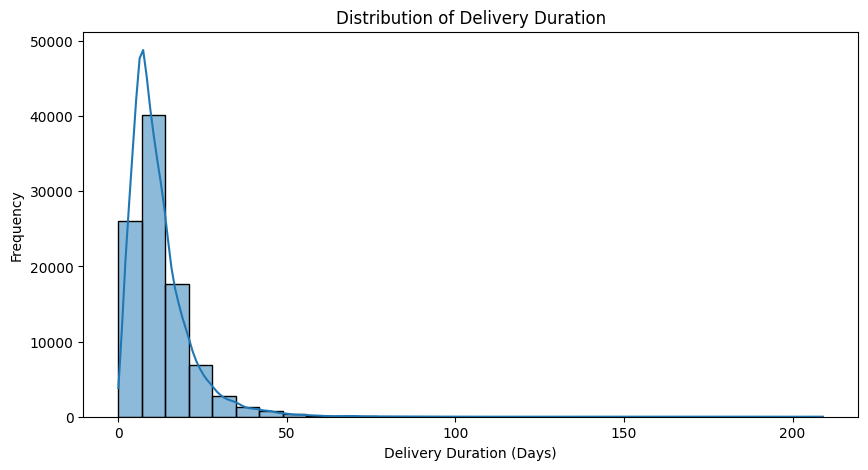

Delivery Duration Statistics:
count    96470.000000
mean        12.093604
std          9.551380
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_duration, dtype: float64

Minimum Delivery Time: 0.0 days
Maximum Delivery Time: 209.0 days
Efficient Deliveries (Top 25%): 99.45%
Inefficient Deliveries (Bottom 25%): 0.02%
Average Delivery Time: 12.09 days
General Efficient Deliveries (Faster than or equal to average): 64.14%
General Inefficient Deliveries (Slower than average): 35.85%


In [108]:
# Convert to datetime if not already
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Filter for delivered orders and calculate the time taken
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days

# Summary statistics on delivery time
delivery_summary = delivered_orders['delivery_duration'].describe()

# Calculate min and max delivery durations
min_delivery_time = delivered_orders['delivery_duration'].min()
max_delivery_time = delivered_orders['delivery_duration'].max()

# Define efficiency thresholds (close to minimum is considered efficient)
threshold_min = min_delivery_time + (max_delivery_time - min_delivery_time) * 0.25  # Top 25% efficient
threshold_max = max_delivery_time - (max_delivery_time - min_delivery_time) * 0.25  # Bottom 25% inefficient

# Count the number of deliveries in each efficiency category
efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= threshold_min].shape[0]
inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] >= threshold_max].shape[0]
total_deliveries = delivered_orders.shape[0]

# Calculate the efficiency percentages for efficient and inefficient deliveries
efficient_percentage = (efficient_deliveries / total_deliveries) * 100
inefficient_percentage = (inefficient_deliveries / total_deliveries) * 100

# General efficiency rates based on average delivery time
average_delivery_time = delivery_summary['mean']
general_efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= average_delivery_time].shape[0]
general_inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] > average_delivery_time].shape[0]

# Calculate the general efficiency percentages
general_efficient_percentage = (general_efficient_deliveries / total_deliveries) * 100
general_inefficient_percentage = (general_inefficient_deliveries / total_deliveries) * 100

# Visualizing delivery duration
plt.figure(figsize=(10, 5))
sns.histplot(delivered_orders['delivery_duration'], bins=30, kde=True)
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (Days)')
plt.ylabel('Frequency')
plt.show()

print("Delivery Duration Statistics:")
print(delivery_summary)

print("")

print(f"Minimum Delivery Time: {min_delivery_time} days")
print(f"Maximum Delivery Time: {max_delivery_time} days")
print(f"Efficient Deliveries (Top 25%): {efficient_percentage:.2f}%")
print(f"Inefficient Deliveries (Bottom 25%): {inefficient_percentage:.2f}%")

print(f"Average Delivery Time: {average_delivery_time:.2f} days")
print(f"General Efficient Deliveries (Faster than or equal to average): {general_efficient_percentage:.2f}%")
print(f"General Inefficient Deliveries (Slower than average): {general_inefficient_percentage:.2f}%")

### Pertanyaan 4 : Which Payment Method used in Buying the Items in our E-Commerce?

**Step Method**
- Grouping and Counting Payment Method
- Visualize it

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\2441179678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='crest')


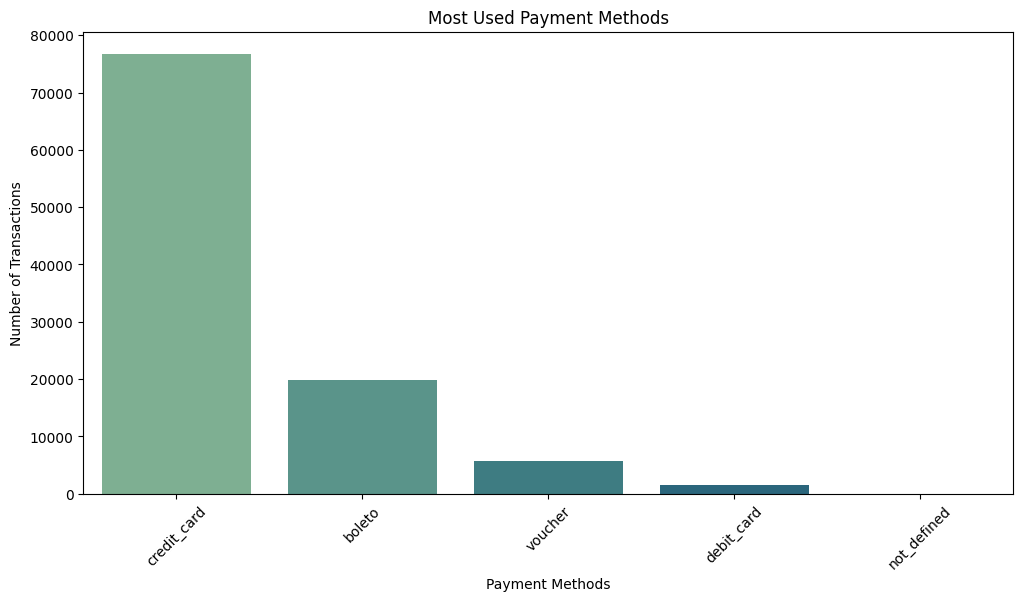

In [87]:
# Group by payment type and count occurrences
payment_methods = payment_df.groupby('payment_type').size().sort_values(ascending=False)

# Plotting payment methods
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='crest')
plt.title('Most Used Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 5 : When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?

**Step Method**
- Extracting Purchase Hour from Dataset
- Grouping Purchase Hour for Every Hour
- Finding the Prime Time and Dead Time Hour
- Visualize it

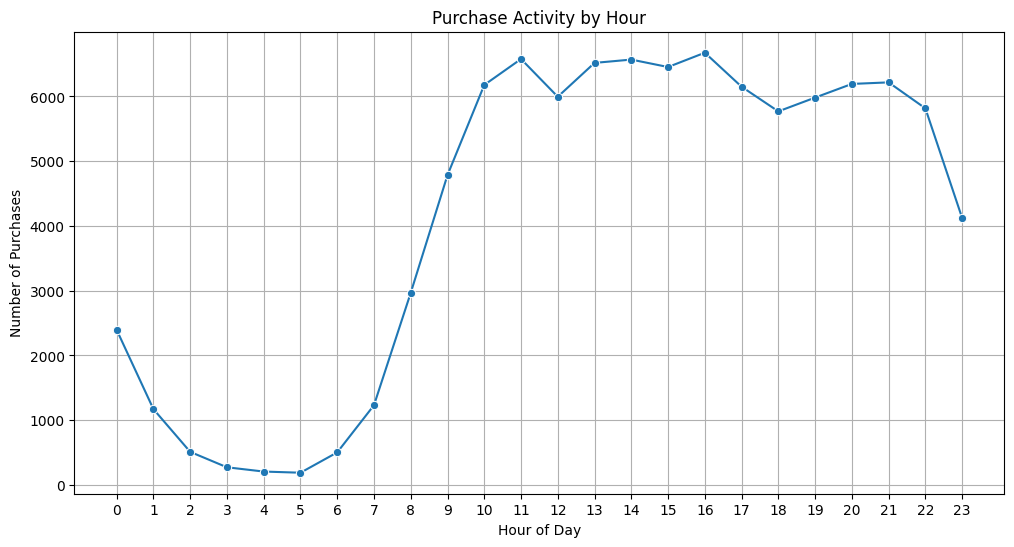

Prime Time: 16:00 with 6675 purchases.
Dead Time: 5:00 with 188 purchases.


In [110]:
# Extract hour from purchase timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Group by hour to see purchase activity
purchase_activity = orders_df.groupby('purchase_hour').size()

# Find the Prime Time (hour with the highest purchase activity)
prime_time_hour = purchase_activity.idxmax()
prime_time_count = purchase_activity.max()

# Find the Dead Time (hour with the lowest purchase activity)
dead_time_hour = purchase_activity.idxmin()
dead_time_count = purchase_activity.min()

# Plotting purchase activity by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=purchase_activity.index, y=purchase_activity.values, marker='o')
plt.title('Purchase Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.xticks(range(24))
plt.grid()
plt.show()

# Display the Prime Time and Dead Time
print(f"Prime Time: {prime_time_hour}:00 with {prime_time_count} purchases.")
print(f"Dead Time: {dead_time_hour}:00 with {dead_time_count} purchases.")

### Pertanyaan 6 : How big is the Purchase Growth on this E-Commerce?

**Step Method**
- Extracting Purchase Month from Dataset
- Grouping Purchase Month for Every Month
- Visualize it

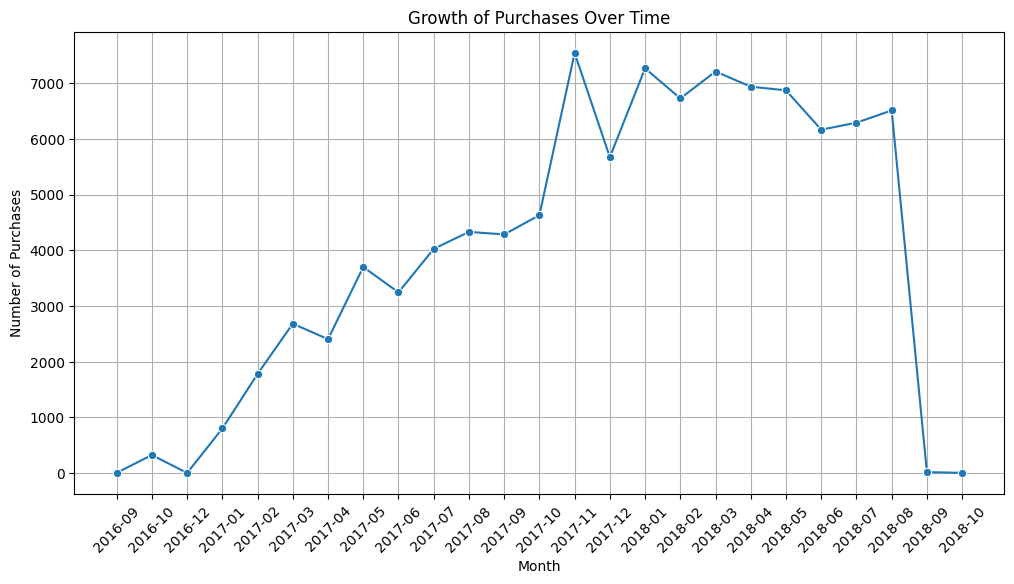

In [89]:
# Extract year and month from purchase timestamp
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and count number of orders
purchase_growth = orders_df.groupby('purchase_month').size()

# Plotting purchase growth over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=purchase_growth.index.astype(str), y=purchase_growth.values, marker='o')
plt.title('Growth of Purchases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### RMF Method

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79

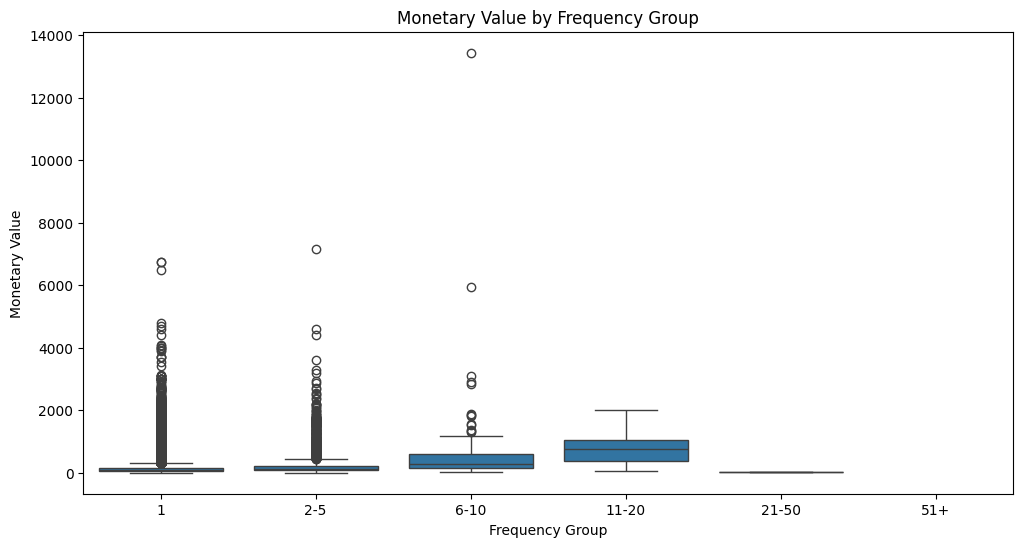

In [132]:
# Merging the datasets to link order items with customers
# First, merge orderitems with orders to get customer_id
order_items_with_orders = orderitems_df.merge(orders_df[['order_id', 'customer_id']], on='order_id', how='left')

# Now, merge with customers_df using customer_id
merged_df = order_items_with_orders.merge(customer_df, on='customer_id', how='left')

# Check the merged DataFrame to ensure the keys are correct
print(merged_df.head())

# RFM Analysis
# Calculate RFM values
current_date = pd.to_datetime("today")
# Assuming you have a purchase timestamp; if not, you'll need to use the appropriate date field
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['shipping_limit_date'])  # Adjust as necessary
rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

# Renaming the columns for clarity
rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Manual clustering for Frequency
bins_frequency = [0, 1, 5, 10, 20, 50, 100]  # Define the bins
labels_frequency = ['1', '2-5', '6-10', '11-20', '21-50', '51+']
rfm_df['Frequency_group'] = pd.cut(rfm_df['Frequency'], bins=bins_frequency, labels=labels_frequency)

# Visualize RFM Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Frequency_group', y='Monetary', data=rfm_df)
plt.title('Monetary Value by Frequency Group')
plt.xlabel('Frequency Group')
plt.ylabel('Monetary Value')
plt.show()

## Conclusion

**1st Question :** Which is the Highest Frequency on Buying Customer by City in our E-Commerce?

In [91]:
# Filter for successful orders
successful_orders = orders_df[orders_df['order_status'] == 'delivered']

# Merge with customer data to get city information
order_city_data = pd.merge(successful_orders, customer_df, on='customer_id')

# Group by city and count the number of purchases
top_cities = order_city_data.groupby('customer_city').size().sort_values(ascending=False).head(10)
print(top_cities)

customer_city
sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
dtype: int64


The Highest Buyer by City is our Customer from **Sao Paulo**

**2nd Question :** Which is the Top Product and Top Seller in our E -Commerce?

In [118]:
# Merge DataFrames
merged_df = orderitems_df.merge(products_df, on='product_id', how='left') \
                           .merge(sellers_df, on='seller_id', how='left')

# Calculate total sales per product
top_products = merged_df.groupby('product_id').agg({'price': 'sum'}).reset_index()
top_products.columns = ['product_id', 'total_sales']

# Merge to get product names and categories
top_products = top_products.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Sort and select top 10 products
top_10_products = top_products.sort_values(by='total_sales', ascending=False).head(10)

# Calculate total sales per seller
top_sellers = merged_df.groupby('seller_id').agg({'price': 'sum'}).reset_index()
top_sellers.columns = ['seller_id', 'total_sales']

# Merge to get seller cities and states
top_sellers = top_sellers.merge(sellers_df[['seller_id', 'seller_city', 'seller_state']], on='seller_id', how='left')

# Sort and select top 10 sellers
top_10_sellers = top_sellers.sort_values(by='total_sales', ascending=False).head(10)

# Display the results
print("Top 10 Products:")
print(top_10_products[['product_category_name', 'total_sales']])

Top 10 Products:
        product_category_name  total_sales
24086            beleza_saude     63885.00
14068            beleza_saude     54730.20
27613                     pcs     48899.34
27039  informatica_acessorios     47214.51
19742         cama_mesa_banho     43025.56
8051   informatica_acessorios     41082.60
4996                    bebes     38907.32
12351              cool_stuff     37733.90
10867      relogios_presentes     37683.42
22112        moveis_decoracao     37608.90


In [119]:
print("\nTop 10 Sellers:")
print(top_10_sellers[['seller_id','seller_city', 'seller_state', 'total_sales']])


Top 10 Sellers:
                             seller_id       seller_city seller_state  \
857   4869f7a5dfa277a7dca6462dcf3b52b2           guariba           SP   
1013  53243585a1d6dc2643021fd1853d8905  lauro de freitas           BA   
881   4a3ca9315b744ce9f8e9374361493884          ibitinga           SP   
3024  fa1c13f2614d7b5c4749cbc52fecda94            sumare           SP   
1535  7c67e1448b00f6e969d365cea6b010ab   itaquaquecetuba           SP   
1560  7e93a43ef30c4f03f38b393420bc753a           barueri           SP   
2643  da8622b14eb17ae2831f4ac5b9dab84a        piracicaba           SP   
1505  7a67c85e85bb2ce8582c35f2203ad736         sao paulo           SP   
192   1025f0e2d44d7041d6cf58b6550e0bfa         sao paulo           SP   
1824  955fee9216a65b617aa5c0531780ce60         sao paulo           SP   

      total_sales  
857     229472.63  
1013    222776.05  
881     200472.92  
3024    194042.03  
1535    187923.89  
1560    176431.87  
2643    160236.57  
1505    141745.53  

The Top Product is **Beleza Saude** with the Number of *63885*

The Top Seller is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items

**3rd Question :** How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?

In [103]:
# Convert to datetime if not already
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Filter for delivered orders and calculate the time taken
delivered_orders = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days

# Summary statistics on delivery time
delivery_summary = delivered_orders['delivery_duration'].describe()

# Calculate min and max delivery durations
min_delivery_time = delivered_orders['delivery_duration'].min()
max_delivery_time = delivered_orders['delivery_duration'].max()

# Define efficiency thresholds (close to minimum is considered efficient)
threshold_min = min_delivery_time + (max_delivery_time - min_delivery_time) * 0.25  # Top 25% efficient
threshold_max = max_delivery_time - (max_delivery_time - min_delivery_time) * 0.25  # Bottom 25% inefficient

# Count the number of deliveries in each efficiency category
efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= threshold_min].shape[0]
inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] >= threshold_max].shape[0]
total_deliveries = delivered_orders.shape[0]

# Calculate the efficiency percentages for efficient and inefficient deliveries
efficient_percentage = (efficient_deliveries / total_deliveries) * 100
inefficient_percentage = (inefficient_deliveries / total_deliveries) * 100

# General efficiency rates based on average delivery time
average_delivery_time = delivery_summary['mean']
general_efficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] <= average_delivery_time].shape[0]
general_inefficient_deliveries = delivered_orders[delivered_orders['delivery_duration'] > average_delivery_time].shape[0]

# Calculate the general efficiency percentages
general_efficient_percentage = (general_efficient_deliveries / total_deliveries) * 100
general_inefficient_percentage = (general_inefficient_deliveries / total_deliveries) * 100

C:\Users\adity\AppData\Local\Temp\ipykernel_20888\1511412117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days


In [104]:
print(f"Minimum Delivery Time: {min_delivery_time} days")
print(f"Maximum Delivery Time: {max_delivery_time} days")
print(f"Efficient Deliveries (Top 25%): {efficient_percentage:.2f}%")
print(f"Inefficient Deliveries (Bottom 25%): {inefficient_percentage:.2f}%")

print(f"Average Delivery Time: {average_delivery_time:.2f} days")
print(f"General Efficient Deliveries (Faster than or equal to average): {general_efficient_percentage:.2f}%")
print(f"General Inefficient Deliveries (Slower than average): {general_inefficient_percentage:.2f}%")

Minimum Delivery Time: 0.0 days
Maximum Delivery Time: 209.0 days
Efficient Deliveries (Top 25%): 99.45%
Inefficient Deliveries (Bottom 25%): 0.02%
Average Delivery Time: 12.09 days
General Efficient Deliveries (Faster than or equal to average): 64.14%
General Inefficient Deliveries (Slower than average): 35.85%


Our Product Efficiency is **64.14%** with the average of **12 Days**

**4th Question :**  Which Payment Method used in Buying the Items in our E-Commerce?

In [109]:
# Group by payment type and count occurrences
payment_methods = payment_df.groupby('payment_type').size().sort_values(ascending=False)

print(payment_methods)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64


Most used Payment is **Credit Card**

**5th Question :**  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?

In [111]:
# Extract hour from purchase timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour

# Group by hour to see purchase activity
purchase_activity = orders_df.groupby('purchase_hour').size()

# Find the Prime Time (hour with the highest purchase activity)
prime_time_hour = purchase_activity.idxmax()
prime_time_count = purchase_activity.max()

# Find the Dead Time (hour with the lowest purchase activity)
dead_time_hour = purchase_activity.idxmin()
dead_time_count = purchase_activity.min()


# Display the Prime Time and Dead Time
print(f"The Customer Prime Time: {prime_time_hour}:00 with {prime_time_count} purchases.")
print(f"The Customer Dead Time: {dead_time_hour}:00 with {dead_time_count} purchases.")

The Customer Prime Time: 16:00 with 6675 purchases.
The Customer Dead Time: 5:00 with 188 purchases.


**6th Question :** How big is the Purchase Growth on this E-Commerce?

In [127]:
# Extract year and month from purchase timestamp
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and count the number of orders
purchase_growth = orders_df.groupby('purchase_month').size()

# Calculate the percentage change from month to month
monthly_percentage_change = purchase_growth.pct_change() * 100

# Calculate the overall percentage growth or decline
initial_orders = purchase_growth.iloc[0]  # Orders in the first month
final_orders = purchase_growth.iloc[-2]   # Orders in the last of the second month

overall_percentage_change = ((final_orders - initial_orders) / initial_orders) * 100

print(f"Overall Purchase Growth from first to last month: {overall_percentage_change:.2f}%")

Overall Purchase Growth from first to last month: 300.00%


The Purchase Growth is Surging to **300%**

##### Final Conclusion
- Which is the Highest Frequency on Buying Customer by City in our E-Commerce?
    - The Largest Buyer by City is **Sao Paulo**, this research concludes that we need to increasing our **Customer Service Quality** in some of the highest rating City, for other cities will be focusing on expanding our E - Commerce uses because the gap between The Highest and other city is pretty big , also we need more newer data to see our Selling Activities
- Which is the Top Product and Top Seller in our E -Commerce?
    - The Top Product for our E - Commerce is **Beleza Saude**, this conclusion will help us to giving some strategies to maintain and growing our product selling through several strategies (Voucher, Discount, Prime Time buying, etc.)
    - The Top Seller for our E - Commerce is from **Guariba** City with the ID of **4869f7a5dfa277a7dca6462dcf3b52b2** reaching the total Sales of *229472* items, from this insight also will helping us to analyze potential Sellers that we can synergize in terms of Production and Delivery to increasing Budget Efficiency
- How Effective it is our Product Flow from Buyed to Sended in our E-Commerce?
    - Our Product Efficiency is **64.14%** with the average of **12 Days**, its showing that we still need to improve our Delivery by Maximizing Warehouse Location
- Which Payment Method used in Buying the Items in our E-Commerce?
    - Most used Payment is **Credit Card**, this research concludes that we need to increasing our Credit Card payment variety with several bank to Maintaining our Payment Flow, other important things is to maintain our System so it doesnt face any Error
-  When is the "Prime Time" and "Dead Time" of our Customer in Buying Stuff?
    - The Customer Prime Time is **16:00** with **6675** purchases.
    - The Customer Dead Time is **5:00** with **188** purchases.
    - This Data will be Helpfull on Creating Strategy for Maximizing our Sellings (ie. Live Selling, Discount Hours, etc.)
- How big is the Purchase Growth on this E-Commerce?
    - Overall Purchase Growth from first to last month is **300.00%**
    - This is showing a Very Healthy growth from our E - Commerce
    - THe problem occured is the data incompleteness on the last 2 Months, so we have to improve it